<a href="https://colab.research.google.com/github/rddelarosa/DSC1107/blob/main/FA_1_DSC1105_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Download the CyTOF data from here Download from here.

2. Choose one of the columns of the dataset and make at least two plots showing its distribution (choose from ECDF, quantile, histogram, density estimate). What does the plot tell you about the distribution of the values in that column?

3. Choose any two of the columns of the dataset and make a Q-Q plot comparing the distributions. What does the Q-Q plot tell you about similarities or differences between the distributions of the values in the two columns?


In [7]:
# Load Libraries ---
library(ggplot2)

# Read the data
data <- read.csv("/cytof_one_experiment.csv")
head(data)

,NKp30,KIR3DL1,NKp44,KIR2DL1,GranzymeB,CXCR6,CD161,KIR2DS4,NKp46,NKG2D,⋯,CD16,TNFa,ILT2,Perforin,KIR2DL2.L3.S2,KIR2DL3,NKG2A,NTB.A,CD56,INFg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1875955,3.6156932,-0.5605694,-0.2936654,2.477893,-0.14470053,-0.3152872,1.94497046,4.0818316,2.6200784,⋯,3.9951417,0.90143498,-0.386027758,6.431983,1.22710292,2.660657999,-0.5220613,4.348923,2.897523,-0.3841108
2,1.0348518,1.7001820,-0.2889611,-0.4798280,3.261016,-0.03392447,-0.4112129,3.80251714,3.7339299,-0.4832788,⋯,4.4082309,1.93590153,2.983874845,6.814827,-0.04141081,3.841304627,4.6771149,3.474335,3.782870,2.7186296
3,2.9996398,6.1411419,1.9032606,0.4823102,4.277562,1.94654156,-0.5022347,-0.32010171,4.5594631,-0.5069090,⋯,6.0023244,-0.02336999,-0.521099944,5.099562,-0.16705075,-0.009694396,-0.4730573,5.634341,5.701186,2.5321763
4,4.2998594,-0.2211586,0.2425707,-0.4831267,3.351808,0.92622195,3.8772370,-0.16969487,4.4831486,1.9272290,⋯,5.8238698,-0.60793749,-0.043783559,5.841797,-0.51753289,-0.592990887,-0.4059049,4.598021,6.065672,2.4564582
5,-0.4386448,-0.5035892,-0.1526320,0.7506128,3.194145,-0.05893640,1.0907379,-0.05033025,0.8379358,-0.4581674,⋯,4.0122501,-0.61989100,1.182703288,4.888777,-0.36251589,-0.398123704,-0.5440881,3.606101,1.966169,3.1470092
6,2.0883050,-0.3992646,3.4550676,-0.5200856,4.345102,-0.36434277,-0.5705891,-0.45033591,4.0550848,3.4283565,⋯,-0.5832926,0.14311030,-0.003258955,3.952542,-0.20194392,-0.202592720,3.8882776,2.346275,6.473243,2.8282987


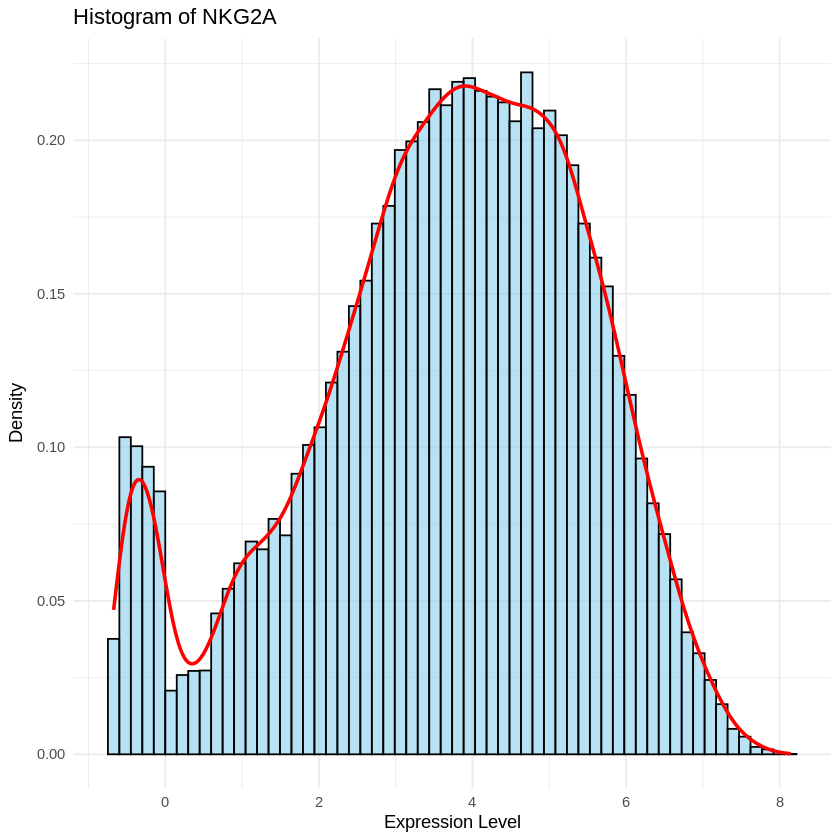

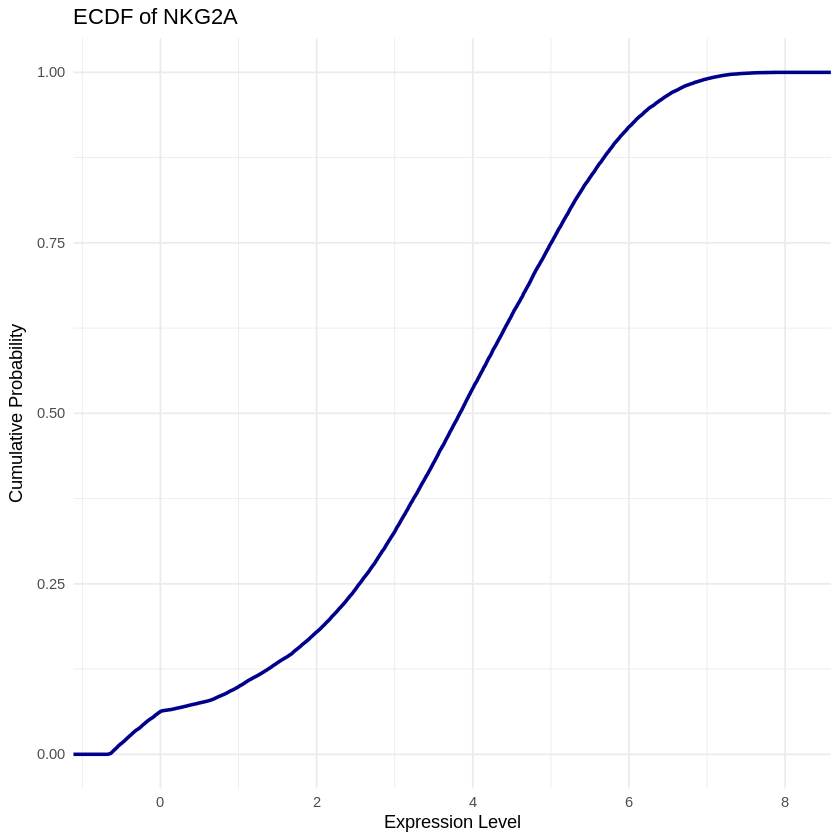

In [11]:
# Task 2: Distribution of ONE Column
# Use data from CyTOF
target_col <- "NKG2A"
plot_data <- data.frame(Value = na.omit(data[[target_col]]))

# Plot A: Histogram
ggplot(plot_data, aes(x=Value)) +
  geom_histogram(aes(y=..density..), bins=60, fill="skyblue", color="black", alpha=0.6) +
  geom_density(color="red", size=1) +
  labs(title = paste("Histogram of", target_col),
       x = "Expression Level", y = "Density") +
  theme_minimal()

# Plot B: ECDF
ggplot(plot_data, aes(x=Value)) +
  stat_ecdf(geom = "step", color="darkblue", size=1) +
  labs(title = paste("ECDF of", target_col),
       x = "Expression Level", y = "Cumulative Probability") +
  theme_minimal()

The plots for the NKG2A column reveal a clear bimodal distribution, characterized by two distinct peaks. The histogram displays a sharp, smaller peak near zero, representing a "negative" population that lacks expression of the marker, while a larger, broader peak centered around 4 represents the "positive" population. The distinct valley separating these two peaks, also visible as a flattened region in the ECDF curve, confirms that the dataset contains two biologically distinct cell subsets regarding NKG2A expression rather than a single uniform population.

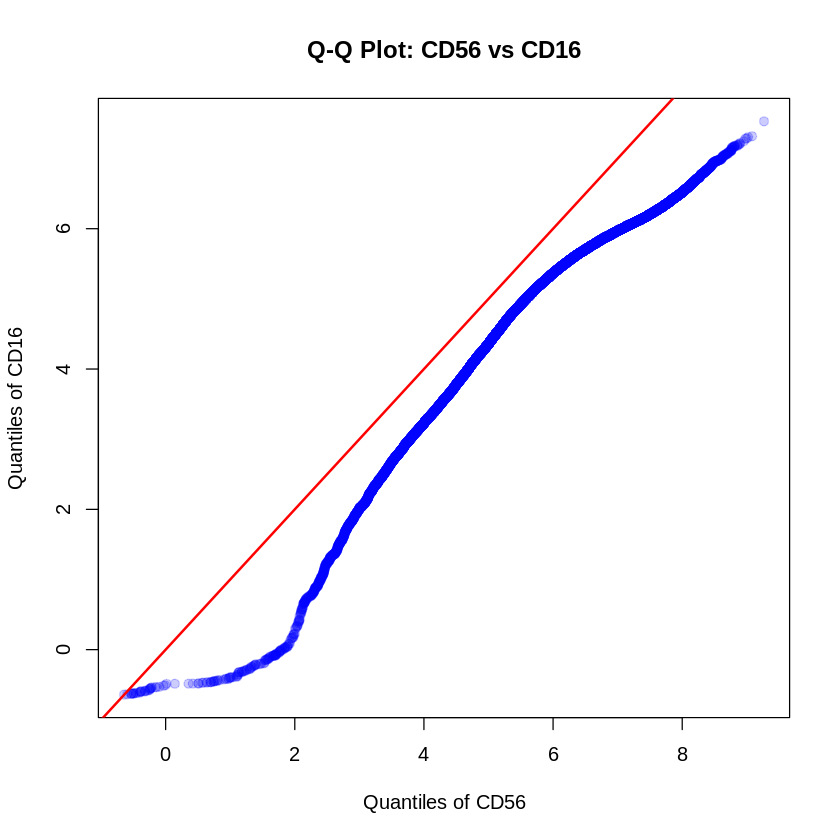

In [12]:
# Task 3: Q-Q Plot Comparison
col_1 <- "CD56"
col_2 <- "CD16"

# Extract data safely (removing empty rows)
vec1 <- na.omit(data[[col_1]])
vec2 <- na.omit(data[[col_2]])

# Set up the Q-Q plot area
qqplot(vec1, vec2,
       main = paste("Q-Q Plot:", col_1, "vs", col_2),
       xlab = paste("Quantiles of", col_1),
       ylab = paste("Quantiles of", col_2),
       pch = 19, col = rgb(0,0,1,0.2))
abline(0, 1, col="red", lwd=2)

The points deviate significantly from the red diagonal line, confirming that CD56 and CD16 have different intensity distributions. This is consistent with NK cell biology, where these markers often define different subpopulations.